Aynur Rahimova

https://www.kaggle.com/code/eslammohamed100/car-price-prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mlflow
import mlflow.sklearn






In [2]:
# Updating global settings
plt.rcParams.update({
    'figure.figsize': (7, 4),      
    'font.size': 12,              
    'axes.titlesize': 8,          
    'axes.labelsize': 12,          
    'axes.grid': True,             
    'grid.alpha': 0.5,               
    'lines.linewidth': 2,            
    'axes.edgecolor': 'grey',      
    'legend.fontsize': 12,           
    'xtick.labelsize': 8,           
    'ytick.labelsize': 8,          
    'xtick.direction': 'in',         
    'ytick.direction': 'in',         
})
plt.show

<function matplotlib.pyplot.show(*args, **kwargs) -> 'None'>

In [3]:
# Loading the dataset
CarPred_path = "C:/Users/Cursist/handson-ml3/linear_reg_car_price_pred/cardekho.csv"
df = pd.read_csv(CarPred_path )
print("Initial Data Shape:", df.shape)

Initial Data Shape: (8128, 12)


In [4]:
#creating copy
df_car = df.copy()
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [64]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [65]:
df_car.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [66]:
# checking duplicate rows
duplicate_rows = df_car.duplicated()
duplicates = df_car[duplicate_rows]
print(duplicates)

                                          name  year  selling_price  \
291                   Hyundai Grand i10 Sportz  2017         450000   
296                           Maruti Swift VXI  2012         330000   
370   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
371                              Lexus ES 300h  2019        5150000   
372             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
7987             Renault Captur 1.5 Diesel RXT  2018        1265000   
7988                  Maruti Ciaz Alpha Diesel  2019        1025000   
8117                    Maruti Swift Dzire VDI  2015         625000   
8126                           Tata Indigo CR4  2013         290000   
8127                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  \
291       35000  Petrol  Individual       Manual   First Owner   
296       50000

In [5]:
df_car_non_dupl = df_car.drop_duplicates(keep= "first")
df_car_non_dupl

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [6]:
df_car_non_dupl["car_age"] = 2025 - df_car_non_dupl["year"]

C:\Users\Cursist\AppData\Local\Temp\ipykernel_304\193332830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_non_dupl["car_age"] = 2025 - df_car_non_dupl["year"]


In [7]:
df_car_new = df_car_non_dupl.drop(["name", "year"], axis=1)
df_car_new

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0,12
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,18


In [8]:
# removing any non-numeric characters  from 'max_power' to get numeriec column
df_car_new['max_power'] = df_car_new['max_power'].str.extract('(\d+)', expand=False).astype(float)

In [9]:
df_car_new['max_power'].head()

0     74.0
1    103.0
2     78.0
3     90.0
4     88.0
Name: max_power, dtype: float64

In [72]:
#computing the quantity of bins for histogram by Square Root Rule
n = len(df_car_new)  

bins = int(np.ceil(np.sqrt(n)))

print(f"Recommended number of bins (Square Root Rule): {bins}")

Recommended number of bins (Square Root Rule): 84


Text(0.5, 1.0, 'Histogram of Selling Price')

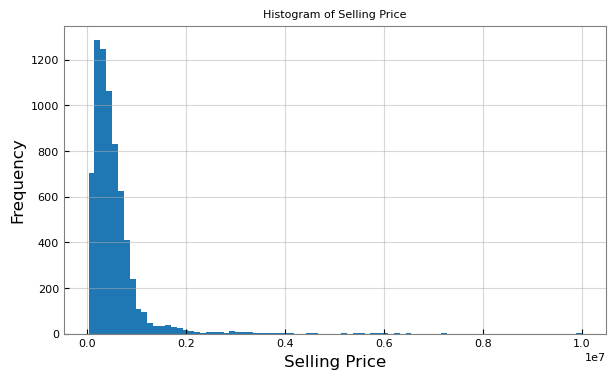

In [73]:
df_car_new['selling_price'].hist(bins=84)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Histogram of Selling Price")

array([[<Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage(km/ltr/kg)'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>,
        <Axes: title={'center': 'seats'}>],
       [<Axes: title={'center': 'car_age'}>, <Axes: >, <Axes: >]],
      dtype=object)

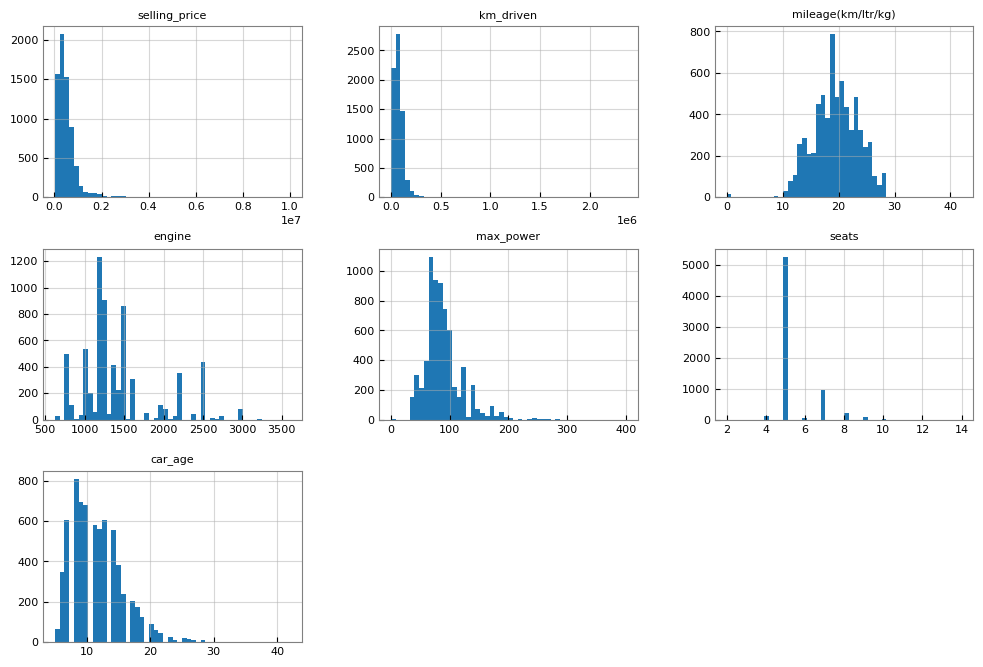

In [74]:
df_car_new.hist(bins=50, figsize=(12,8))

In [75]:
#missing values
df_car_new.isnull().sum()

selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             206
seats                 208
car_age                 0
dtype: int64

In [76]:
df_car_new.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,5.0,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.0,5.0,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.0,5.0,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,5.0,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.0,5.0,18


In [77]:
num_columns = df_car_new[["selling_price", "km_driven", "mileage(km/ltr/kg)", "engine", "seats","max_power", "car_age"]]
cat_columns = df_car_new[["fuel", "seller_type", "transmission", "owner"]]

Text(0.5, 1.0, 'Correlation Matrix for numerical columns')

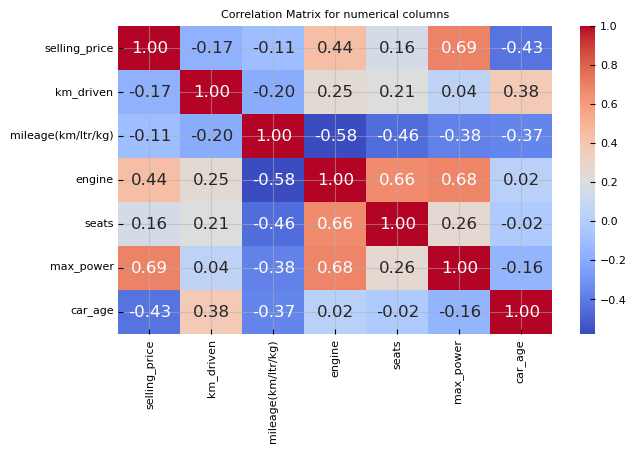

In [78]:
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for numerical columns')


I tried to not apply log1 transformation to "mileage(km/ltr/kg)" and "seats". Results with applied log1 transformation to "mileage(km/ltr/kg)" and "seats" are higher.

In [9]:
# log1p transformation , if there is 0
df_car_new[["selling_price","km_driven", "mileage(km/ltr/kg)", "engine", "max_power", "seats", "car_age"]] = np.log1p(df_car_new[["selling_price", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power", "seats", "car_age"]])

In [10]:
num_features = ["km_driven", "mileage(km/ltr/kg)", "engine", "max_power", "seats", "car_age"]
cat_features = ["fuel", "seller_type", "transmission", "owner"]


An error occurred during encoding that indicated the Nan value in the sale price. So I made sure to handle it.

In [11]:
imputer_sel_pr = SimpleImputer(strategy="median")
imputer_sel_pr.fit(df_car_new["selling_price"].values.reshape(-1,1))

SimpleImputer(strategy='median')

In [12]:
df_car_new["selling_price"].isnull().sum()

0

In [13]:
X = df_car_new.drop("selling_price", axis=1)
y = df_car_new["selling_price"]

In [14]:
# pipeline for numerical features
num_pip = Pipeline(steps= [
    ("imputer_num", SimpleImputer(strategy= "mean")),
    ("scaler", StandardScaler())
])

In [87]:
# visualize the numerical pipeline:
set_config(display='diagram')

num_pip

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [15]:
# pipeline for categorical features
cat_pip = Pipeline(steps= [
    ("imputer_cat", SimpleImputer(strategy= "most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown= "ignore"))
])

In [89]:
# visualize the categorical pipeline:
set_config(display='diagram')

cat_pip

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder())])

In [16]:
# combine numerical and categorical features into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pip, num_features),
    ("cat", cat_pip, cat_features)],
    remainder= "passthrough")

In [91]:
# visualize the preprocessor pipeline:
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['km_driven', 'mileage(km/ltr/kg)', 'engine',
                                  'max_power', 'seats', 'car_age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner'])])

In [17]:
df_car_prepared = preprocessor.fit_transform(df_car_new)

In [18]:
df_car_prepared.shape

(6926, 21)

In [19]:
preprocessor.get_feature_names_out()

array(['num__km_driven', 'num__mileage(km/ltr/kg)', 'num__engine',
       'num__max_power', 'num__seats', 'num__car_age', 'cat__fuel_CNG',
       'cat__fuel_Diesel', 'cat__fuel_LPG', 'cat__fuel_Petrol',
       'cat__seller_type_Dealer', 'cat__seller_type_Individual',
       'cat__seller_type_Trustmark Dealer', 'cat__transmission_Automatic',
       'cat__transmission_Manual', 'cat__owner_First Owner',
       'cat__owner_Fourth & Above Owner', 'cat__owner_Second Owner',
       'cat__owner_Test Drive Car', 'cat__owner_Third Owner',
       'remainder__selling_price'], dtype=object)

I also added models from the original notebook to compare

In [20]:
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=10, max_features='sqrt', random_state=42),
    
    "XGBoost": XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42),
    
    "Linear Regression": LinearRegression(
        fit_intercept=True),
    
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    
    "Ridge regression model": Ridge(
        alpha=1.0, solver='auto', random_state=42),
    
    "Lasso regression model": Lasso(
        alpha=0.1, max_iter=1000, random_state=42),
    
    "Elastic regression model": ElasticNet(
        alpha=0.1, l1_ratio=0.5, max_iter=1000, random_state=42),
    
    "Decision tree model": DecisionTreeRegressor(
        max_depth=10, min_samples_split=5, random_state=42),
    
    "K-nearest neighbors model": KNeighborsRegressor(
        n_neighbors=5, weights='distance', algorithm='auto'),
}

In [21]:
# in the notebook to be compared (from kaggle.com) the MSE, score_train and score_test are calculated. So i have also added them to be able to compare

# with no inverse log transformation    

#splitting data into train and test set, and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
model_names = []
Test_scores = []
MSE_scores = []
Train_scores = []
for name, model in models.items():
    model_pip = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", model)
    ])

    model_pip.fit(X_train, y_train)

    score_train = model_pip.score(X_train, y_train)
    score_test = model_pip.score(X_test, y_test)

    y_pred = model_pip.predict(X_test)
    
    # evaluating
    mse = mean_squared_error(y_test, y_pred)               
    rmse = mean_squared_error(y_test, y_pred, squared= False)

    # i will use to plot results
    model_names.append(name) 
    Test_scores.append(score_test)
    Train_scores.append(score_train)
    MSE_scores.append(mse)
    
    print(f"{name} - RMSE: {rmse:.4f}, MSE: {mse:.4f}"
          f"\n{name} - Score_train: {score_train:.4f}, Score_test: {score_test:.4f} \n")

Random Forest - RMSE: 0.2559, MSE: 0.0655
Random Forest - Score_train: 0.9255, Score_test: 0.8828 

XGBoost - RMSE: 0.2355, MSE: 0.0555
XGBoost - Score_train: 0.9434, Score_test: 0.9007 

Linear Regression - RMSE: 0.3303, MSE: 0.1091
Linear Regression - Score_train: 0.8270, Score_test: 0.8047 

Gradient Boosting - RMSE: 0.2575, MSE: 0.0663
Gradient Boosting - Score_train: 0.9043, Score_test: 0.8813 

Ridge regression model - RMSE: 0.3300, MSE: 0.1089
Ridge regression model - Score_train: 0.8269, Score_test: 0.8051 

Lasso regression model - RMSE: 0.3713, MSE: 0.1379
Lasso regression model - Score_train: 0.7675, Score_test: 0.7532 

Elastic regression model - RMSE: 0.3575, MSE: 0.1278
Elastic regression model - Score_train: 0.7876, Score_test: 0.7712 

Decision tree model - RMSE: 0.2782, MSE: 0.0774
Decision tree model - Score_train: 0.9408, Score_test: 0.8615 

K-nearest neighbors model - RMSE: 0.2832, MSE: 0.0802
K-nearest neighbors model - Score_train: 0.9978, Score_test: 0.8565 



In [ ]:
# XBoost gives the best results:
# XGBoost - RMSE: 0.2355, MSE: 0.0555
# XGBoost - Score_train: 0.9434, Score_test: 0.9007

In [ ]:
# GridSearchCV for XGBoost
xgbr = XGBRegressor(objective='reg:squarederror', random_state=42) 

XGBoost_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("XGBregressor", xgbr) 
])

param_grid = {
    'XGBregressor__n_estimators': [100, 200, 300],  
    'XGBregressor__max_depth': [3, 5, 7, 10],     
    'XGBregressor__learning_rate': [0.01, 0.1, 0.2],
    'XGBregressor__subsample': [0.8, 1.0],        
    'XGBregressor__colsample_bytree': [0.8, 1.0],  
    'XGBregressor__gamma': [0, 0.1, 0.2]          
}

grid_search = GridSearchCV(
    XGBoost_pipe,
    param_grid,
    cv=10,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

with mlflow.start_run():
    best_model = grid_search.best_estimator_
    mlflow.sklearn.log_model(best_model, "best_model")

    best_params = grid_search.best_params_
    mlflow.log_params(best_params)

    best_score = -grid_search.best_score_
    mlflow.log_metric("best_score", best_score)

    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score}")

    for i, params in enumerate(grid_search.cv_results_['params']):
        with mlflow.start_run(nested=True):
            model = best_model.set_params(**params)
            model.fit(X_train, y_train)  
            mlflow.sklearn.log_model(model, f"model_{i}")
            mlflow.log_params(params)
            score = -grid_search.cv_results_['mean_test_score'][i]
            mlflow.log_metric("score", score)

    


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


2025/02/16 21:22:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters: {'XGBregressor__colsample_bytree': 0.8, 'XGBregressor__gamma': 0.1, 'XGBregressor__learning_rate': 0.1, 'XGBregressor__max_depth': 10, 'XGBregressor__n_estimators': 300, 'XGBregressor__subsample': 1.0}
Best score: 0.22390714823545896


2025/02/16 21:22:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/16 21:22:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/16 21:22:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/16 21:22:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/16 21:22:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/16 21:22:47 

In [26]:
# plot results 
df_plot = pd.DataFrame({
    'Model': model_names,
    'Test_scores': Test_scores,
    'Train_scores': Train_scores,
    'MSE_scores': MSE_scores    
})

df_melted = df_plot.melt(id_vars='Model', value_vars=['Test_scores', 'Train_scores', 'MSE_scores'], 
                    var_name='Metric', value_name='Score')

fig = px.bar(
    df_melted, 
    x='Model', 
    y='Score', 
    color='Metric',  
    barmode='group', 
    labels={"x": "Model", "y": "Score"},
    title="Model Performance Comparison"
)

fig.show()

In [31]:
# with inversed log transformation    not to use 

# Iterate through models
for name, model in models.items():
    model_pip = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    model_pip.fit(X_train, y_train)
    y_pred = model_pip.predict(X_test)
    
    # inverse log transformation 
    y_pred_tr = np.expm1(y_pred) 
    y_test_tr = np.expm1(y_test) 
    
    # evaluating
    rmse = mean_squared_error(y_test_tr, y_pred_tr, squared=False)
    mse = mean_squared_error(y_test_tr, y_pred_tr)
    print(f"{name}: \n Transformed predictions:{y_pred_tr.mean()}, \n Transformed test results:{y_test_tr.mean()}, \n rmse: {rmse:.4f}, \n mse:{mse:.4f}")



Random Forest: 
 Transformed predictions:468740.83579355024, 
 Transformed test results:500420.02597402595, 
 rmse: 192886.3519, 
 mse:37205144754.4182
XGBoost: 
 Transformed predictions:486237.28125, 
 Transformed test results:500420.02597402595, 
 rmse: 153018.5802, 
 mse:23414685899.9676
Linear Regression: 
 Transformed predictions:479126.7307459138, 
 Transformed test results:500420.02597402595, 
 rmse: 230081.2717, 
 mse:52937391591.2585
Gradient Boosting: 
 Transformed predictions:482906.9864535899, 
 Transformed test results:500420.02597402595, 
 rmse: 155031.7962, 
 mse:24034857832.5840
Ridge regression model: 
 Transformed predictions:478649.90949155507, 
 Transformed test results:500420.02597402595, 
 rmse: 227597.6829, 
 mse:51800705260.9798
Lasso regression model: 
 Transformed predictions:442529.89103591733, 
 Transformed test results:500420.02597402595, 
 rmse: 297938.3867, 
 mse:88767282269.9133
Elastic regression model: 
 Transformed predictions:452576.6545023555, 
 Tra

In [32]:
# cross validation (cv = 10 gives higher results than cv = 5)

cv_folds = 10

model_names = []
Test_scores_cr = []
MSE_scores_cr = []
Train_scores_cr = []
for name, model in models.items():
    model_pip = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    

    model_pip.fit(X_train, y_train)

    score_train_cr = model_pip.score(X_train, y_train)
    score_test_cr = model_pip.score(X_test, y_test)

    pred_y_train_cr = model_pip.predict(X_train)
    pred_y_test_cr = model_pip.predict(X_test)

    # MSE, RMSE - cross-validation 
    mse_scores_cr = -cross_val_score(model_pip, X_train, y_train, 
                                   scoring='neg_mean_squared_error', cv=cv_folds)
    rmse_scores_cr = -cross_val_score(model_pip, X_train, y_train, 
                                    scoring='neg_root_mean_squared_error', cv=cv_folds)
    
    model_names.append(name) 
    Test_scores_cr.append(score_test_cr)
    Train_scores_cr.append(score_train_cr)
    MSE_scores_cr.append(mse_scores_cr.mean())

    print(f"{name} Cross-Validation Results:")
    print(f" Mean MSE: {mse_scores_cr.mean():.4f}")
    print(f" Mean RMSE: {rmse_scores_cr.mean():.4f}")
    print(f" Train Score : {score_train_cr:.4f}, Test Score: {score_test_cr:.4f}\n")
    print(f"Describe MSE scores: \n{pd.Series(mse_scores_cr).describe()} \n")

Random Forest Cross-Validation Results:
 Mean MSE: 0.0652
 Mean RMSE: 0.2552
 Train Score : 0.9255, Test Score: 0.8828

Describe MSE scores: 
count    10.000000
mean      0.065236
std       0.005161
min       0.055324
25%       0.063477
50%       0.064811
75%       0.069888
max       0.071138
dtype: float64 

XGBoost Cross-Validation Results:
 Mean MSE: 0.0542
 Mean RMSE: 0.2328
 Train Score : 0.9434, Test Score: 0.9007

Describe MSE scores: 
count    10.000000
mean      0.054236
std       0.003735
min       0.047108
25%       0.052475
50%       0.053816
75%       0.056705
max       0.059870
dtype: float64 

Linear Regression Cross-Validation Results:
 Mean MSE: 0.1031
 Mean RMSE: 0.3208
 Train Score : 0.8270, Test Score: 0.8047

Describe MSE scores: 
count    10.000000
mean      0.103101
std       0.009979
min       0.085989
25%       0.097380
50%       0.101766
75%       0.109523
max       0.121359
dtype: float64 

Gradient Boosting Cross-Validation Results:
 Mean MSE: 0.0631
 Mean R

In [ ]:
# XGBoost Cross-Validation Results:
# Mean MSE: 0.0542
# Mean RMSE: 0.2328
# Train Score : 0.9434, Test Score: 0.9007

# Describe MSE scores: 
# count    10.000000
# mean      0.054236
# std       0.003735
# min       0.047108
# 25%       0.052475
# 50%       0.053816
# 75%       0.056705
# max       0.059870
# dtype: float64 

# Scores with no inversed log transformaton
# XGBoost - RMSE: 0.2355, MSE: 0.0555
# XGBoost - Score_train: 0.9434, Score_test: 0.9007

# XGBoost Cross-Validation gives slightly better results.

In [33]:
# plot results for cross validation
df_plot = pd.DataFrame({
    'Model': model_names,
    'Test_scores_cross': Test_scores_cr,
    'Train_scores_cross': Train_scores_cr,
    'MSE_scores_cross': MSE_scores_cr
    })

df_melted = df_plot.melt(id_vars='Model', value_vars=['Test_scores_cross', 'Train_scores_cross', 'MSE_scores_cross'], 
                    var_name='Metric', value_name='Score')

fig = px.bar(
    df_melted, 
    x='Model', 
    y='Score', 
    color='Metric',  
    barmode='group', 
    labels={"x": "Model", "y": "Score"},
    title="Model Performance for cross validation"
)

fig.show()

In [ ]:
# original max results
# Random forest model:

# train score 0.9958398222589243, test score 0.9785267956189263
# train error 2673226660.4354463, test error 15118587165.772108

# my results
# XGBoost Cross-Validation gives the highest results.

# Mean MSE: 0.0542
# Mean RMSE: 0.2328
# Train Score : 0.9434, Test Score: 0.9007


In [34]:
feature_names = model_pip.named_steps["preprocessor"].get_feature_names_out()

feature_importances = models["XGBoost"].feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)


                              Feature  Importance
5                        num__car_age    0.365879
13        cat__transmission_Automatic    0.169806
3                      num__max_power    0.153918
9                    cat__fuel_Petrol    0.075163
7                    cat__fuel_Diesel    0.069008
2                         num__engine    0.057834
4                          num__seats    0.024143
15             cat__owner_First Owner    0.023487
11        cat__seller_type_Individual    0.017469
1             num__mileage(km/ltr/kg)    0.011377
0                      num__km_driven    0.005590
19             cat__owner_Third Owner    0.004947
8                       cat__fuel_LPG    0.004943
17            cat__owner_Second Owner    0.004665
16    cat__owner_Fourth & Above Owner    0.004047
10            cat__seller_type_Dealer    0.003191
6                       cat__fuel_CNG    0.002854
18          cat__owner_Test Drive Car    0.001680
12  cat__seller_type_Trustmark Dealer    0.000000


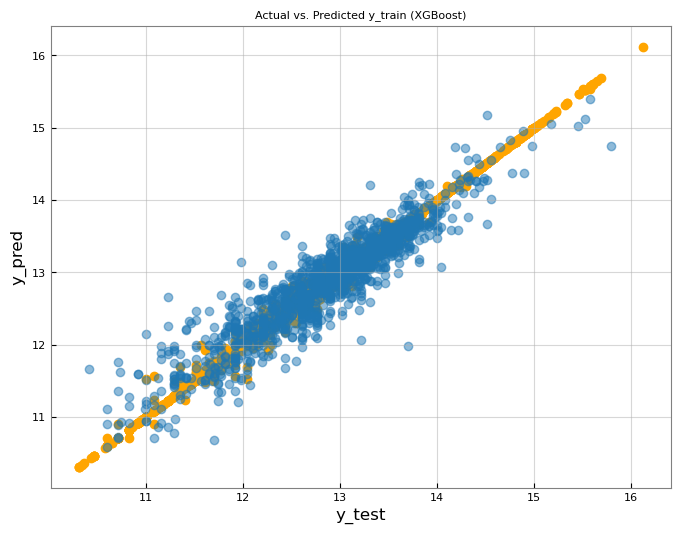

In [35]:
for name, model in models.items():
   if name == "XGBoost": 
      pred_y_train = model_pip.predict(X_train) 
      pred_y_test = model_pip.predict(X_test)
      
      plt.figure(figsize=(8, 6))
      plt.scatter(y_train, pred_y_train,color = 'orange') 
      plt.scatter(y_test, pred_y_test, alpha=0.5) 
      
      plt.xlabel('y_test') 
      plt.ylabel('y_pred') 
      plt.title('Actual vs. Predicted y_train (XGBoost)')